<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20KNN-MLP%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Hybrid KNN-MLP for 10 class classifications based on UNSW-NB15 dataset**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset_P2.2.csv")

# Check for missing values
dataset.isnull().sum()

id                   0
dur                  0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
Class                0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

In [4]:
from keras.utils import np_utils
encoder = LabelEncoder()
y = encoder.fit_transform(dataset['Class'])
y = np_utils.to_categorical(y, num_classes=10)
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X.shape)
print(y.shape)

(175341, 40)
(175341, 10)


In [5]:
# Data preprocessing
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### **Hybrid KNN-MLP for 10 Class**

In [7]:
# K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [8]:
# MLP model
mlp = MLPClassifier(hidden_layer_sizes=(64,), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train, y_train)

# Predictions from K-NN model
y_pred_knn = knn.predict(X_test)

# Predictions from MLP model
y_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [9]:
# Combine predictions from K-NN and MLP models
y_pred = np.argmax((y_pred_knn + y_pred_mlp), axis=1)

# Convert y_test and y_pred back to class labels
y_test_labels = np.argmax(y_test, axis=1)
y_pred_labels = y_pred

# Evaluation metrics
print("Combined Model:")
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))

Combined Model:
              precision    recall  f1-score   support

           0       0.22      0.89      0.35     11277
           1       0.72      0.43      0.54     11343
           2       0.72      0.44      0.54     11225
           3       0.60      0.34      0.43     11219
           4       0.54      0.14      0.22     11297
           5       0.74      0.38      0.50     11174
           6       1.00      0.98      0.99     11074
           7       0.84      0.46      0.59     11129
           8       0.79      0.66      0.72     11112
           9       0.79      0.76      0.78     11150

    accuracy                           0.55    112000
   macro avg       0.70      0.55      0.57    112000
weighted avg       0.69      0.55      0.56    112000

[[10078    58    30    26   132   294     0   136   235   288]
 [ 4795  4888   630   549   166    50     3    50    97   115]
 [ 4756   475  4893   500   135    83     5    68   172   138]
 [ 5652   484   419  3815   364   12

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(8,6.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])
  ax.yaxis.set_ticklabels(['Normal','Analysis','Backdoor','DoS','Exploits','Fuzzers','Generic','Reconnaissance','Shellcode','Worms'])

  plt.xticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  plt.yticks(rotation=45)  # Add this line to rotate the x-axis labels by 45 degrees
  
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Hybrid KNN-MLP Model


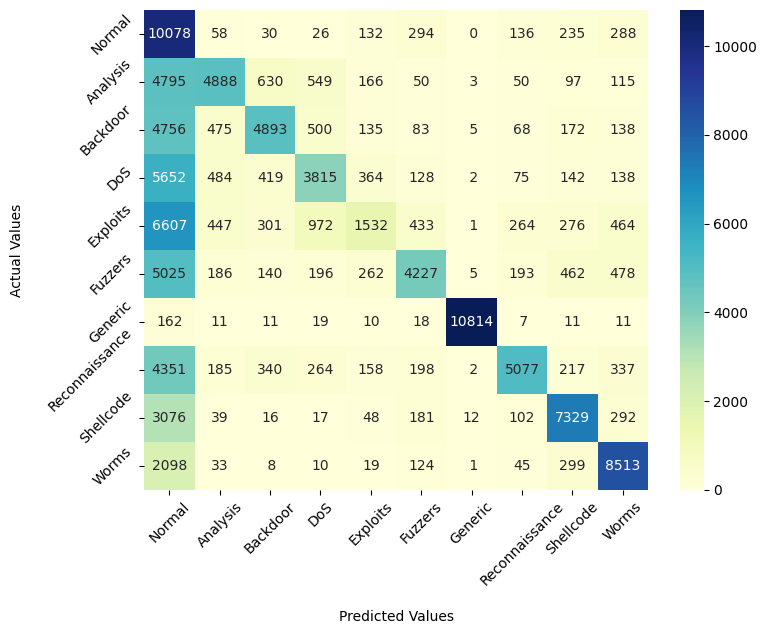

In [11]:
print("Confusion Matrix of Hybrid KNN-MLP Model") 
conf_mat(y_test_labels, y_pred_labels)

In [12]:
report = classification_report(y_test_labels, y_pred_labels, output_dict=True)
detection_rates = {}
for cls in range(10):
    detection_rates[encoder.inverse_transform([cls])[0]] = report[str(cls)]['recall']
print("Detection rates:", detection_rates)

Detection rates: {0: 0.8936773964706926, 1: 0.43092656263775014, 2: 0.43590200445434296, 3: 0.3400481326321419, 4: 0.13561122421881916, 5: 0.37828888491140145, 6: 0.9765215820841611, 7: 0.45619552520442086, 8: 0.6595572354211663, 9: 0.7634977578475336}
